# SEP532 - 인공지능 이론과 실제 (2022 Spring)
## Deep Learning Practice 
#### Prof. Ho-Jin Choi
#### School of Computing, KAIST

---

## 3-1. Convolutional Variational Autoencoder 

### What is the Variational Autoencoder(VAE)?
##### References 
- https://blog.evjang.com/2016/08/variational-bayes.html
- https://ratsgo.github.io/generative%20model/2018/01/27/VAE/


#### Overview 

<img src="https://i.imgur.com/PhHb2aF.jpg" width="700">

VAE는 Generative Model 중 하나로, 확률분포($P(x)$)를 학습함으로써, **입력 데이터가 만들어지는 확률 분포를 찾고 이를 통해 입력 데이터를 생성**하는 것이 목적이다.

- Encoder 네트워크는 학습용 데이터($x$)를 입력으로 받고 잠재 변수($z$)의 확률분포에 대한 파라미터를 출력한다. 
- Decoder는 잠재변수에 대한 확률 분포 $p(z)$ 에서 샘플링한 벡터를 입력받아 이를 이용해 원본 이미지를 복원한다.

VAE는 최적화를 통해 아래의 두가지 문제를 푼다.
1. 주어진 데이터를 잘 설명하는 잠재 변수의 분포를 찾는 것 (Encoder 역할) -> $q_{\phi}(z|x)$
1. 잠재변수로 부터 원본 이미지와 같은 이미지를 복원 (Decoder 역할) -> $p_{\theta}(x|z)$

**MNIST 생성 예:**

![evolution of output during training](https://tensorflow.org/images/autoencoders/cvae.gif)

##### Auto-Encoder VS. VAE

<img src=https://velog.velcdn.com/images%2Fohado%2Fpost%2Fbed5b9b7-ea9a-4fdf-8df0-93cf657c6602%2Fimage.png width="900">


#### Encoder 
Encoder의 역할은 데이터가 주어졌을 때 Decoder가 원래의 데이터로 잘 복원할 수 있는 $z$ 를 샘플링 할 수 있는 이상적인 확률분포 $p(z|x)$ 를 찾는 것이다. 하지만 어떤 것이 이상적인 확률분포 $p(z|x)$ 인지는 아무도 모른다. VAE 방법론에서는 이 문제를 해결하기 위해 **Variational Inference(VI)**를 사용한다.

우리가 찾고 싶은 분포 $p(z|x)$는 Bayes' rule에 의해 다음과 같이 표현 가능
$p(z|x) = \frac{p(x|z)p(z)}{p(x)}$. 

여기서 분모 $p(x)$는 $\int_{z}p(x|z)p(z) dz$ 로써, intractable한 계산량을 가지고 있다. 

즉, posterior에 해당하는 $p(z|x)$를 estimate 해야하며 이에 대한 대표적인 방법론으로 sampling 기반의 Markov chain Monte Carlo(MCMC)와 Variational Inference 방법론이 있다. 

MCMC 방법론의 경우, 추정하려는 분포의 parameter 수가 많으면 매우 느려지기 때문에 VAE에서는 보통 VI를 사용하여 posterior를 추정한다. 

##### Variational Inference
우리가 이상적인 확률분포를 모르지만, 이를 추정하기 위해서 다루기 쉬운 분포(approximation class, 대표적으로 Gaussian distribution)를 가정하고 이 확률분포의 모수(평균, 분산)를 바꿔가며, 이상적인 확률분포에 근사하게 만들어 그 확률분포를 대신 사용하는 것이다. 

이 다루기 쉬운 분포를 $q_{\phi}$ 라고 한다면, Encoder는 $\phi$ 라는 파라미터들을 바꾸어가며, $q_{\phi}(z|x)$  확률 분포를 이상적인 확률 분포 $p(z|x)$ 에 근사시키는 역할을 수행한다. 

보통 $q_{\phi}(\cdot)$ 은 Gaussian 정규 분포라고 가정하며, $z$ 의 marginal distribution은 평균이 0이고 분산이 1인 표준 정규분포로 가정한다.

<img src="https://4.bp.blogspot.com/-OCU72-Cp5lg/V6fxbBAV4oI/AAAAAAAAFE4/BMcR5OYwZqwARnqFnm3I9I_S46O-IH-uQCLcB/s400/Untitled%2Bpresentation%2B%25282%2529.png" width="600">

VI는 우리가 목표로 하는 이상적인 확률분포 $P$를 근사하는 확률분포 $Q$를 추정하기 위해 **Kullback–Leibler divergence(KLD)**를 이용하여 두 분포 사이의 차이를 계산하고, 이를 minimizing 하게된다. 

즉, 우리가 구해야 하는 KLD에 대한 식은 다음과 같다.

$KL(Q_\phi(Z|X)||P(Z|X)) = \sum_{z \in Z}{q_\phi(z|x)\log\frac{q_\phi(z|x)}{p(z|x)}}$

위 식은 reverse KLD로써, 분포 $P(Z)$와 분포 $Q_{\phi}(Z)$ 사이의 정보량의 차이를 계산하고, 이 차이를 분포 $Q$의 파라미터 $\phi$에 대해 minimizing함으로써 분포 $P$를 추정한다.

(reverse KLD를 사용한 이유: https://agustinus.kristia.de/techblog/2016/12/21/forward-reverse-kl/)

$\phi^*=arg\min_\phi KL(Q(Z|X)||p(Z|X))$

<img src="https://3.bp.blogspot.com/-fHQrw49f-GI/V6ghG9Lv2YI/AAAAAAAAFFw/KUHaZF9Xu-8W4nIUJQZp0T_4nbY63Tz0gCLcB/s640/reverse-KL.png" width="700">


#### Decoder
Decoder는 추출한 샘플을 입력으로 받아 다시 원본으로 재구축하는 역할을 수행한다. 즉, decoder 파마리터 $\theta$에 대해 $p_{\theta}(x|z)$로부터 원본을 복원한다. 

정리하면, VAE의 encoder는 우리가 가지고 있는 데이터($x$)의 분포를 z를 통해 잘 표현할 수 있는 $q_{\phi}(p(z|x)$ 분포와 $q_{\phi}$ 분포로부터 셈플링된 잠재변수 $z$를 이용하여 원래 데이터 생성을 위한 $p_{\theta}$ 분포를 학습하여, 테스트 단계에서 새로운 이미지에 대해서 그대로 입력 이미지를 복원시킨다. 

## Import TensorFlow and other libraries

In [2]:
import tensorflow as tf

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

## Load the MNIST dataset
Each MNIST image is originally a vector of 784 integers, each of which is between 0-255 and represents the intensity of a pixel. We model each pixel with a Bernoulli distribution in our model, and we statically binarize the dataset.

In [3]:
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

In [4]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

# Normalizing the images to the range of [0., 1.]
train_images /= 255.
test_images /= 255.

# Binarization
train_images[train_images >= .5] = 1.
train_images[train_images < .5] = 0.
test_images[test_images >= .5] = 1.
test_images[test_images < .5] = 0.

In [5]:
TRAIN_BUF = 60000
BATCH_SIZE = 100
TEST_BUF = 10000

## Use *tf.data* to create batches and shuffle the dataset

In [6]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(TRAIN_BUF).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices(test_images).shuffle(TEST_BUF).batch(BATCH_SIZE)

### Encoder

In [7]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.input_enc = tf.keras.layers.InputLayer(input_shape=(28, 28, 1))
        self.conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu')
        self.flat = tf.keras.layers.Flatten()
        self.dense_mean = tf.keras.layers.Dense(latent_dim)
        self.dense_log_var = tf.keras.layers.Dense(latent_dim)
               
    def call(self, inputs):
        x = self.input_enc(inputs)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flat(x)
        mean = self.dense_mean(x)
        log_var = self.dense_log_var(x)
        
        return mean, log_var

### Decoder

In [8]:
class Decoder(tf.keras.layers.Layer):

    def __init__(self):
        super(Decoder, self).__init__()
        self.input_dec = tf.keras.layers.InputLayer(input_shape=(latent_dim,))
        self.dense = tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu)
        self.reshape = tf.keras.layers.Reshape(target_shape=(7, 7, 32))
        self.conv_trans1 = tf.keras.layers.Conv2DTranspose(filters=64,
                                                           kernel_size=3,
                                                           strides=(2, 2),
                                                           padding="SAME",
                                                           activation='relu')
        self.conv_trans2 = tf.keras.layers.Conv2DTranspose(filters=32,
                                                           kernel_size=3,
                                                           strides=(2, 2),
                                                           padding="SAME",
                                                           activation='relu')
        # No activation
        self.conv_trans3 =  tf.keras.layers.Conv2DTranspose(filters=1, 
                                                            kernel_size=3, 
                                                            strides=(1, 1), 
                                                            padding="SAME")

    def call(self, inputs, apply_sigmoid):
        x = self.input_dec(inputs)
        x = self.dense(x)
        x = self.reshape(x)
        x = self.conv_trans1(x)
        x = self.conv_trans2(x)
        x = self.conv_trans3(x)
        
        if apply_sigmoid:
            probs = tf.sigmoid(x)
            return probs
        
        return x

### ELBO (Evidence Lower Bound)

Encoder에서 이상적인 분포 $P(Z|X)$에 대해 근사하는 $Q_{\phi}(Z|X)$를 구하기 위해 KLD를 사용했었는데, 이에 대한 수식을 다시 정리하면 ($p(z|x)=\frac{P(x,z}{P(x)}$),


\begin{align} 
KL(Q||P) & = \sum_{z \in Z}{q_\phi(z|x)\log\frac{q_\phi(z|x)p(x)}{p(z,x)}} && \text{(1)}\\ 
& = \sum_{z \in Z}{q_\phi(z|x)\big(\log{\frac{q_\phi(z|x)}{p(z,x)}} + \log{p(x)}\big)} \\ 
& = \Big(\sum_{z}{q_\phi(z|x)\log{\frac{q_\phi(z|x)}{p(z,x)}}}\Big) + \Big(\sum_{z}{\log{p(x)}q_\phi(z|x)}\Big) \\ 
& = \Big(\sum_{z}{q_\phi(z|x)\log{\frac{q_\phi(z|x)}{p(z,x)}}}\Big) + \Big(\log{p(x)}\sum_{z}{q_\phi(z|x)}\Big) && \text{note: $\sum_{z}{q(z)} = 1 $} \\ 
& = \log{p(x)} + \Big(\sum_{z}{q_\phi(z|x)\log{\frac{q_\phi(z|x)}{p(z,x)}}}\Big)  \\ 
\end{align}

와 같이 정리된다. 여기서 $log p(x)$는 우리가 학습하려는 $\phi$와 관련없으므로 상수로 치면, 결국 KLD는 $\Big(\sum_{z}{q_\phi(z|x)\log{\frac{q_\phi(z|x)}{p(z,x)}}}\Big)$를 최소화하는 것과 같게 된다. 이를 다시 풀어쓰면 다음과 같다.

\begin{align} 
\sum_{z}{q_\phi(z|x)\log{\frac{q_\phi(z|x)}{p(z,x)}}} & = \mathbb{E}_{z \sim Q_\phi(Z|X)}\big[\log{\frac{q_\phi(z|x)}{p(z,x)}}\big]\\ 
& = \mathbb{E}_Q\big[ \log{q_\phi(z|x)} - \log{p(x,z)} \big] \\ 
& = \mathbb{E}_Q\big[ \log{q_\phi(z|x)} - (\log{p(x|z)} + \log(p(z))) \big] && \text{(via  $\log{p(x,z)=p(x|z)p(z)}$) }\\ 
& = \mathbb{E}_Q\big[ \log{q_\phi(z|x)} - \log{p(x|z)} - \log(p(z))) \big] \\ 
\end{align} 

즉, 위의 식을 최소화하는 것은, 전체식에 -1을 곱한 식을 최대화 하는것과 같으므로,

\begin{align} 
\text{maximize } \mathcal{L} & = -\sum_{z}{q_\phi(z|x)\log{\frac{q_\phi(z|x)}{p(z,x)}}} \\ 
& = \mathbb{E}_Q\big[ -\log{q_\phi(z|x)} + \log{p(x|z)} + \log(p(z))) \big] \\ 
& =  \mathbb{E}_Q\big[ \log{p(x|z)} + \log{\frac{p(z)}{ q_\phi(z|x)}} \big] && \text{(2)} \\ 
\end{align}

와 같이 표현 가능하며, $\mathcal{L}$을 다시 정리하면,

\begin{align*} 
\mathcal{L} & =  \mathbb{E}_Q\big[ \log{p(x|z)} + \log{\frac{p(z)}{ q_\phi(z|x)}} \big] \\ 
& =   \mathbb{E}_Q\big[ \log{p(x|z)} \big] + \sum_{Q}{q(z|x)\log{\frac{p(z)}{ q_\phi(z|x)}}} && \text{Definition of expectation} \\ 
& =  \mathbb{E}_Q\big[ \log{p(x|z)} \big] - KL(Q(Z|X)||P(Z)) && \text{Definition of KL divergence} && \text{(3)} 
\end{align*}

과 같이 된다. 원래 목적인 $KL(Q||P)$ 식을 $log p(x)$에 대해 다시 정리하면 다음과 같다. 

\begin{align*} 
KL(Q||P) & = \log p(x) - \mathcal{L} \\ 
\log p(x) & = \mathcal{L} + KL(Q||P) && \text{(4)}  \\
\log p(x) & \ge \mathcal{L} && (ELBO) \\ 
\end{align*}

위 식에서 $p(X)$는 초기 계산불가능하였던 전체 데이터에 대한 분포이며, 이는 식에 따라 $\mathcal{L}$과 KLD값으로 정리되며, KLD 값은 Jensen's Inequality에 의하여 항상 0보다 큰 값을 가지므로(https://m.blog.naver.com/enewltlr/220911100795), 결국 $log p(x)$ 값은 $\mathcal{L}$ 값보다 항상 크거나 같게된다. 

즉, $\mathcal{L}$은 $log p(x)$ 대한 하한(lower bund)가 되며, 이를 **ELVO(Evidence Lower Bound)**라고 한다. 

\begin{align*} 
\mathcal{L} & = \log p(x) - KL(Q(Z|X)||P(Z|X)) =  \mathbb{E}_Q\big[ \log{p(x|z)} \big] - KL(Q(Z|X)||P(Z))
\end{align*}

$\mathcal{L}$은 앞서 보았듯이 위와 같으며, 첫번째 항은 Q 분포에서 샘플링된 Z를 이용하여 x를 다신 재구축하는 것에 대한 에러값이며, 두번째 항은 현재 샘플링 된 z에 대한 정규화 에러가 되고, 학습을 통해 $\mathcal{L}$ 최대화(=KLD 최소화)하게하는 Q 분포의 모수를 찾는다.
 
<img src="https://seunghyunseo.github.io/assets/images/ae_to_vae/elbo_kld.png" width="400">

### Reparameterization Trick
Decoder는 Encoder에서 출력한 $q_{\phi}q(z|x)$ 확률 분포의 모수를 이용하여 z 값을 샘플링하게되는데, 이렇게 샘플링 되는 값들은 모델 자체에 stochasticity 한 속성을 부여하기 때문에 동일한 입력에 대해서 같은 출력이 나오는 determinative한 deep learning 모델에 적용할 수 없고, 뿐만 아니라 back propagation이 불가능하기 때문에 모델 학습을 수행할 수 없다. 

이를 해결하기 위해, 임의의 정규분포를 갖는 노이즈 변수 $\epsilon$으로부터 어떤 값을 샘플링하고, 이를 $Q$ 분포의 평균과 분산을 이용하여 미분가능한 변환함수로 만들어서, $z$값을 계산하게된다.  

<img src="https://1.bp.blogspot.com/-fOv-fxk6W0Y/WQ13qrHrulI/AAAAAAAABqw/dTXlXdQHIrAGjjz5Vm7X97RkxvV4-FZuwCK4B/s1600/vae_4.PNG" width="600">

$\tilde{z}=g_\phi (\epsilon,x)~~with~~\epsilon\sim p(\epsilon).$ 
$g_\phi (\epsilon,x)$는 $\phi$로 미분가능한 변환 함수이며, 이 함수를 이용하여 임의의 함수 $f(z)$의 $Q_{\phi}(z|x)$에 대한 Monte Carlo expectation estimate를 이용해 기댓값 식을 다음과 같이 바꿀 수 있다. 

$\mathbb{E}_{q_\phi(z|x^{(i)})}\left[f(z)\right]=\mathbb{E}_{p(\epsilon)}\left[f(g_\phi (\epsilon,x^{(i)}))\right]=\frac{1}{L}\sum_{l=1}^L f(g_\phi (\epsilon^{(l)},x^{(i)})),~~where~~\epsilon^{(l)}\sim p(\epsilon).$

single value estimate에 대한 식은 다음과 같다. 

$\tilde{\cal{L}}(\theta,\phi;x^{(i)})=-D_{KL}(q_\phi(z|x^{(i)})||p_\theta(z))+\frac{1}{L}\sum_{l=1}^L (\log p_\theta(x^{(i)}|z^{(i,l)})), \\where~~z^{(i,l)}=g_\phi (\epsilon^{(i,l)},x^{(i)})~~and~~\epsilon^{(l)}\sim p(\epsilon).$

결론적으로 stochasticity한 성질은 $\epsilon$에 의해 확률적 특성이 보존되고, 변환함수가 $\phi$에 대해 미분가능하므로, 학습과정에서 gradient descent를 이용하여 역전파가 가능해진다. 보통 가우시안 분포에 대해 변환함수는 다음과 같다. 

$z=\mu(X)+\Sigma^{1/2}*\epsilon$


<img src="https://1.bp.blogspot.com/-V-m6dOVaUL8/WQ2JKJ4Jj4I/AAAAAAAABrA/BjxqKMDfR6ggYCCqUNlBFiS4cqlyisgKACK4B/s1600/vae_3.PNG" width="500">

### VAE 구현

앞서 소개한 $\mathcal{L}$을 계산하기 위해서는 먼저 $p(x|z)$의 기댓값은 샘플링된 $z$를 이용하여 샘플의 표본평균식을 이용하여 계산가능하며, KLD의 경우, $Q_{phi}(z|x^i)$와 $P(z)$ 두 multivariate Gaussian 분포에 대한 KLD 식으로 계산 가능하다. (자세한 식 참고: https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence#Multivariate_normal_distributions)

실제 구현에서는 $\mathbb{E}_{q_\phi(z|x)}[\log(p(x|z))] + \mathbb{E}_{q_\phi(z|x)}[\log(p(z))] - \mathbb{E}_{q_\phi(z|x)}[\log(q(z|x))]$의 각각 값을 직접 구하여 값을 얻을 수 있다.

In [10]:
class CVAE(tf.keras.Model):
    def __init__(self, latent_dim=32, name='autoencoder', **kwargs):
        super(CVAE, self).__init__(name=name, **kwargs)
        self.latent_dim = latent_dim
        self.encoder = Encoder(latent_dim=latent_dim)
        self.decoder = Decoder()
        
    def call(self, x):
        mean, log_var = self.encoder(x)
        z = self.reparameterize(mean, log_var)
        reconstructed = self.decoder(z, apply_sigmoid=False)
        
        # Add KL divergence regularization loss.
        #kl_loss = - 0.5 * tf.reduce_mean(
        #    log_var - tf.square(mean) - tf.exp(log_var) + 1)
        # self.add_loss(kl_loss)
        
        return mean, log_var, z, reconstructed
    
    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean
    
    @tf.function
    def sample(self, eps=None):
        if eps is None:
            eps = tf.random.normal(shape=(100, self.latent_dim))
        return self.decoder(eps, apply_sigmoid=True)


### Training

* We start by iterating over the dataset
* During each iteration, we pass the image to the encoder to obtain a set of mean and log-variance parameters of the approximate posterior $q(z|x)$
* We then apply the *reparameterization trick* to sample from $q(z|x)$
* Finally, we pass the reparameterized samples to the decoder to obtain the logits of the generative distribution $p(x|z)$
* **Note:** Since we use the dataset loaded by keras with 60k datapoints in the training set and 10k datapoints in the test set, our resulting ELBO on the test set is slightly higher than reported results in the literature which uses dynamic binarization of Larochelle's MNIST.

### Generate Images

* After training, it is time to generate some images
* We start by sampling a set of latent vectors from the unit Gaussian prior distribution $p(z)$
* The generator will then convert the latent sample $z$ to logits of the observation, giving a distribution $p(x|z)$
* Here we plot the probabilities of Bernoulli distributions


In [12]:
def generate_and_save_images(model, epoch, test_input):
    predictions = model.sample(test_input)
    fig = plt.figure(figsize=(4,4))
    
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
        
    # tight_layout minimizes the overlap between 2 sub-plots
    plt.savefig(os.path.join('./cvae_results', 'image_at_epoch_{:04d}.png'.format(epoch)))
    plt.show()
    
def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(
        -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
        axis=raxis)

@tf.function
def compute_loss(x, mean, log_var, z, reconstructed):
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=reconstructed, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, log_var)
    
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)

In [ ]:
epochs = 100
latent_dim = 50
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])

model = CVAE(latent_dim)
optimizer = tf.keras.optimizers.Adam(1e-4)

generate_and_save_images(model, 0, random_vector_for_generation)

# Iterate over epochs.
for epoch in range(1, epochs + 1):
    start_time = time.time()

    # Iterate over the batches of the dataset.
    for x_batch_train  in train_dataset:
        with tf.GradientTape() as tape:
            mean, log_var, z, reconstructed = model(x_batch_train)
            loss = compute_loss(x_batch_train, mean, log_var, z, reconstructed)
            
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
    end_time = time.time()

    if epoch % 1 == 0:
        loss = tf.keras.metrics.Mean()
        for x_batch_test in test_dataset:
            mean, log_var, z, reconstructed = model(x_batch_test)
            loss(compute_loss(x_batch_test, mean, log_var, z, reconstructed))
            
        elbo = -loss.result()
        display.clear_output(wait=False)
        print('Epoch: {}, Test set ELBO: {}, '
              'time elapse for current epoch {}'.format(epoch,
                                                        elbo,
                                                        end_time - start_time))
        
        generate_and_save_images(model, epoch, random_vector_for_generation)

### Display an image using the epoch number

In [13]:
def display_image(epoch_no):
    return PIL.Image.open(os.path.join('./cvae_results', 'image_at_epoch_{:04d}.png'.format(epoch_no)))

(-0.5, 287.5, 287.5, -0.5)

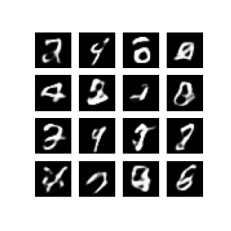

In [15]:
plt.imshow(display_image(epochs))
plt.axis('off')# Display images

### Generate a GIF of all the saved images.

In [16]:
anim_file = 'cvae.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./cvae_results/image*.png')
    filenames = sorted(filenames)
    last = -1
    for i,filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

import IPython
if IPython.version_info >= (6,2,0,''):
    display.Image(filename=anim_file)

If you're working in Colab you can download the animation with the code below:

In [17]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download(anim_file)